## Summary:

### We are trying to build a model that predicts the diabetes in patients.


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv ('diabetes_012_health_indicators_BRFSS2015.csv') 


# Exploratory Data Analysis (EDA)

## Take a quick look at the data:

In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.shape

(253680, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Data types: float64 (12 columns), object (7 columns)


In [8]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### There is no mising data

In [11]:
data.duplicated().sum()

23899

#### There are 23899 dupicated rows so they should be removed

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(229781, 22)

<AxesSubplot:>

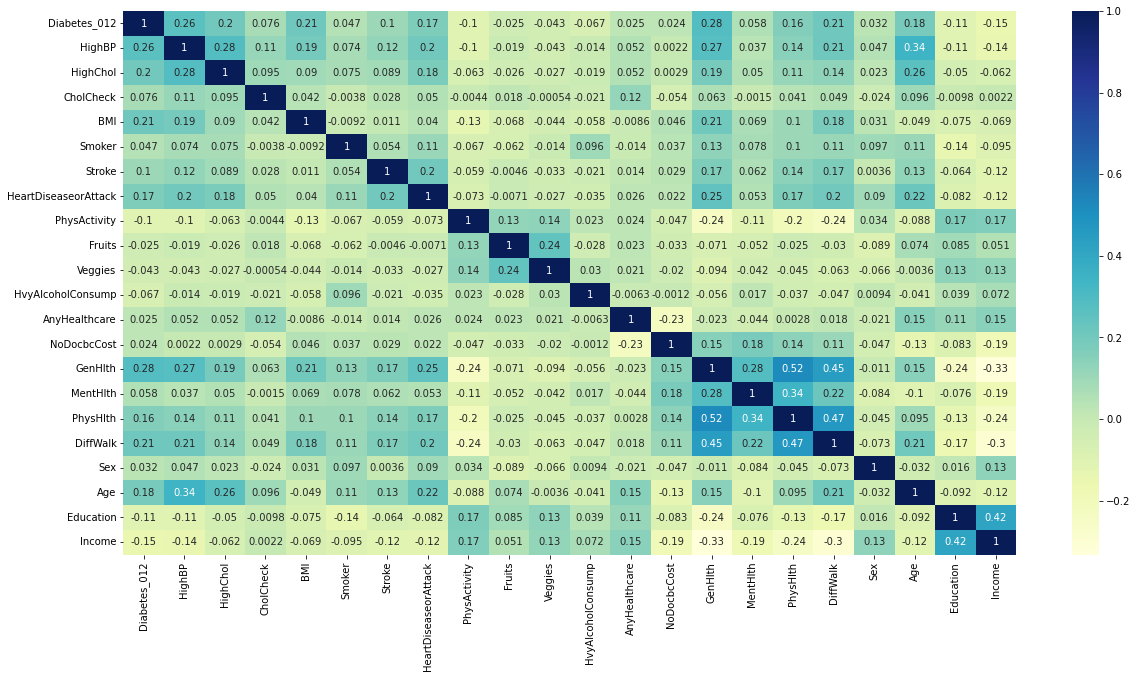

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [15]:
df_vis=data.copy()

In [16]:
#transform data
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'No Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pre Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'


## Visualizing Data


In [17]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [18]:
cols = list(df_vis.columns)
cols_df=cols[1:]

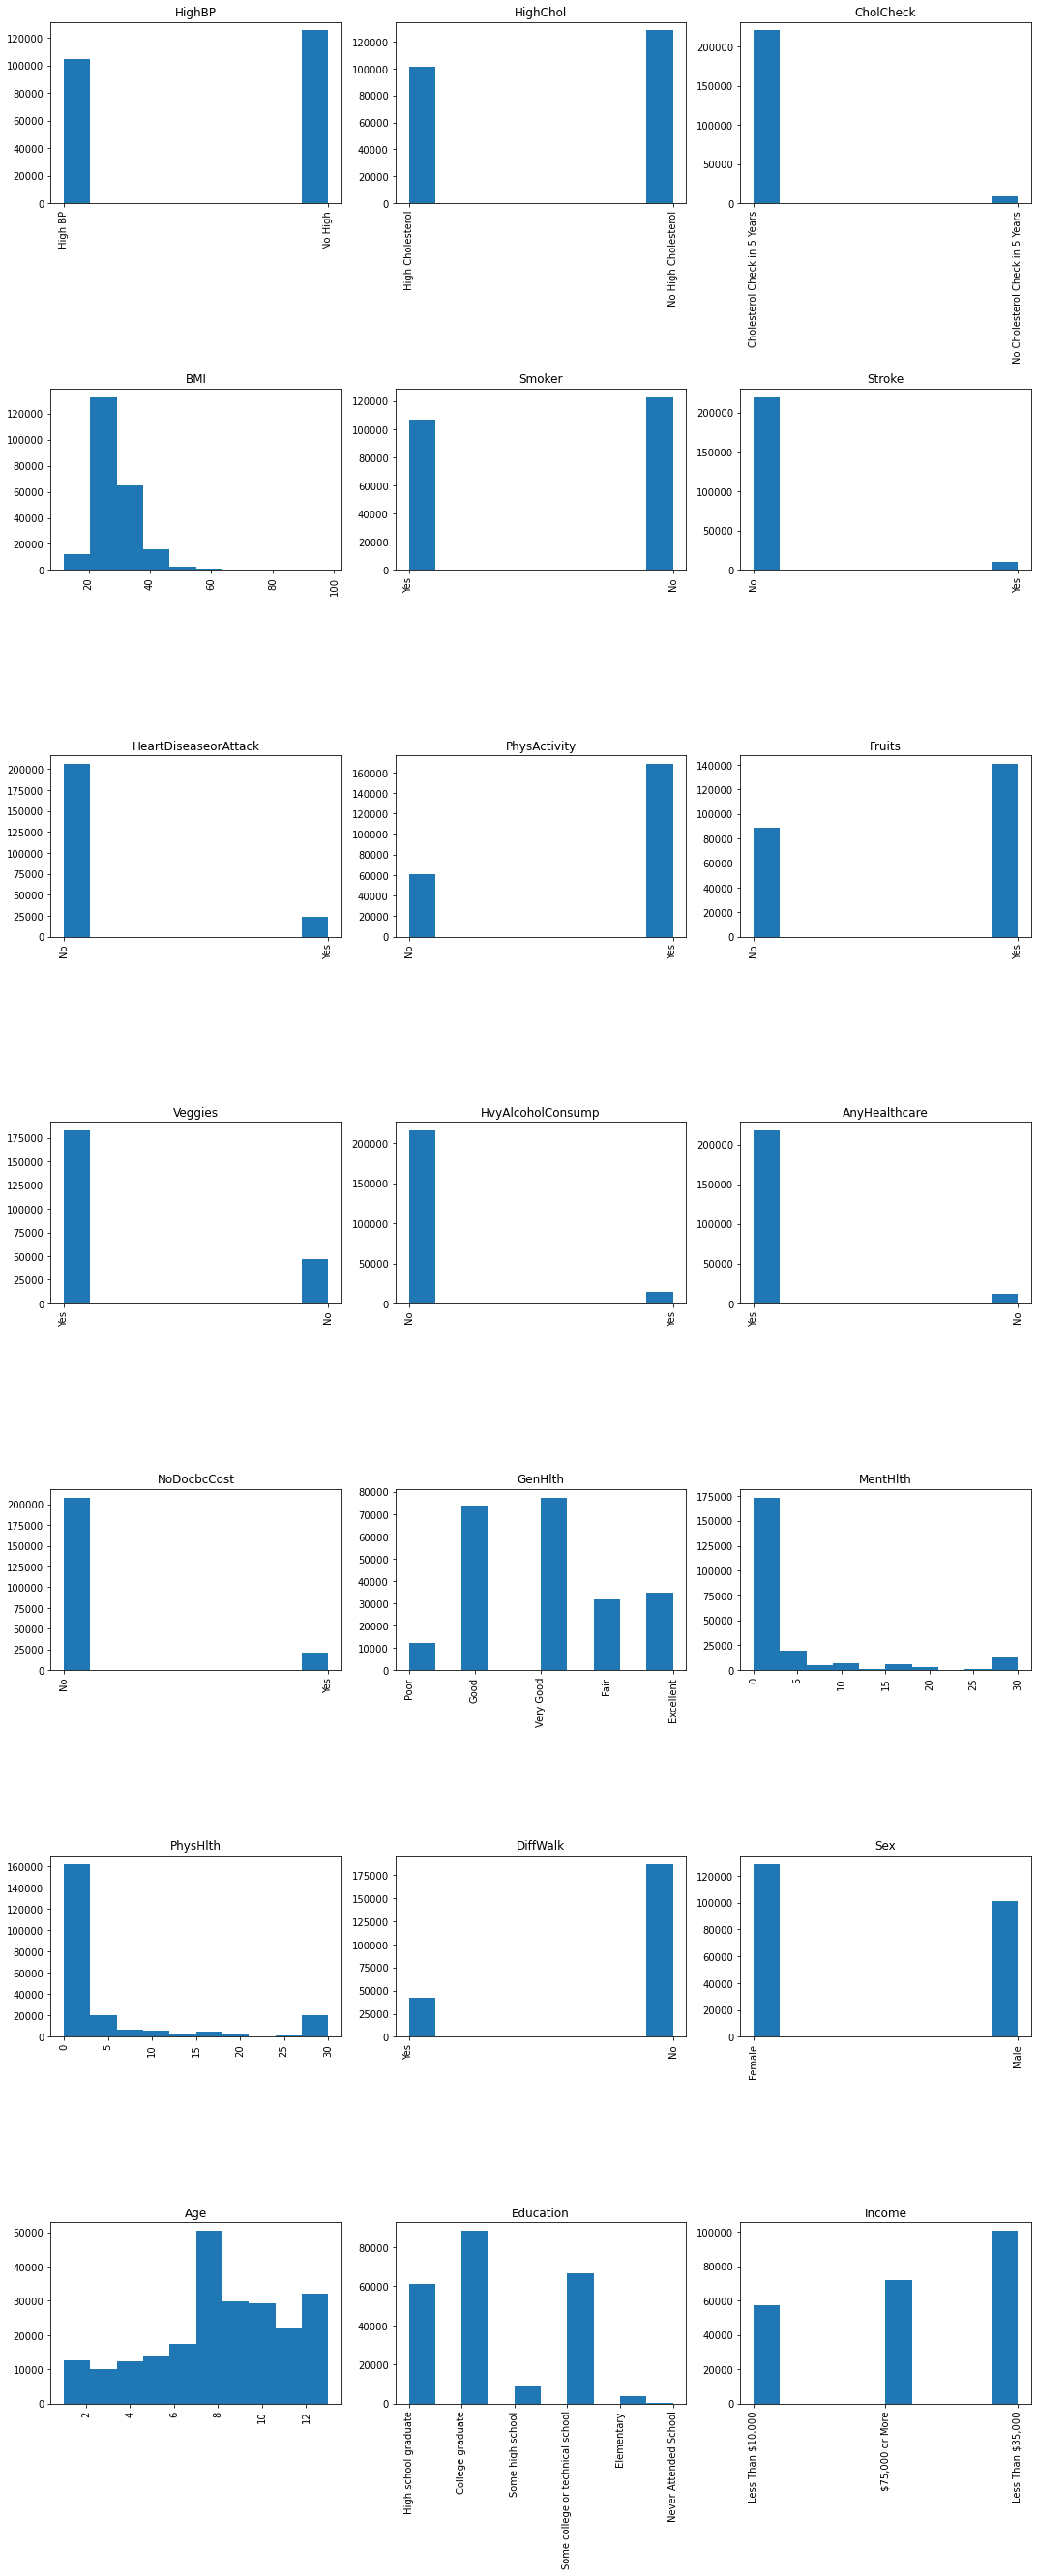

In [19]:
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

## Ratio of diabetes in the dataset with their types


In [20]:
df_vis['Diabetes_012'].value_counts()

No Diabetes     190055
Diabetes         35097
Pre Diabetes      4629
Name: Diabetes_012, dtype: int64

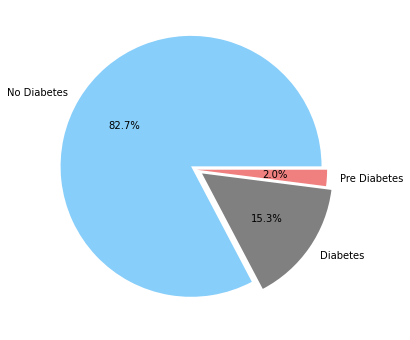

In [21]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df_vis['Diabetes_012'].value_counts()[0], df_vis['Diabetes_012'].value_counts()[1], df_vis['Diabetes_012'].value_counts()[2]]
colors = ['lightskyblue', 'grey', 'lightcoral']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df_vis);



#### "No diabetes" is the most common case in the dataset, followed by "diabetes" and then "pre-diabetes".

## correlation with Diabetes_012 through bar graph

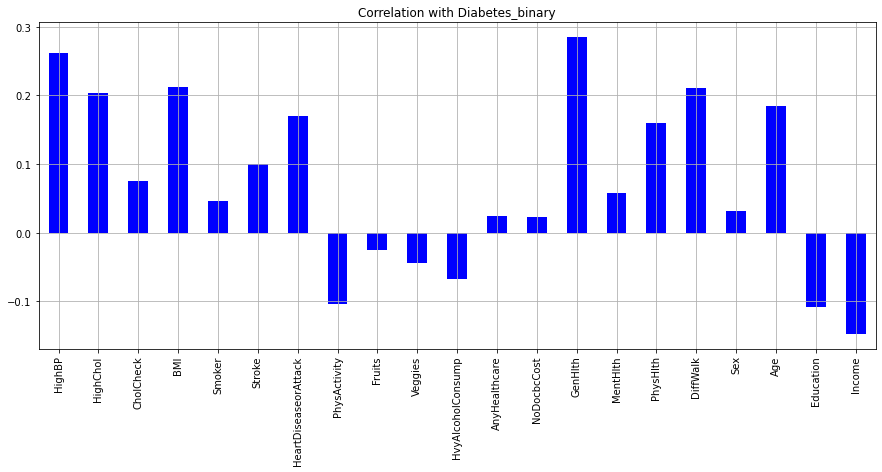

In [22]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_012.

## Distribution of diabetes among genders

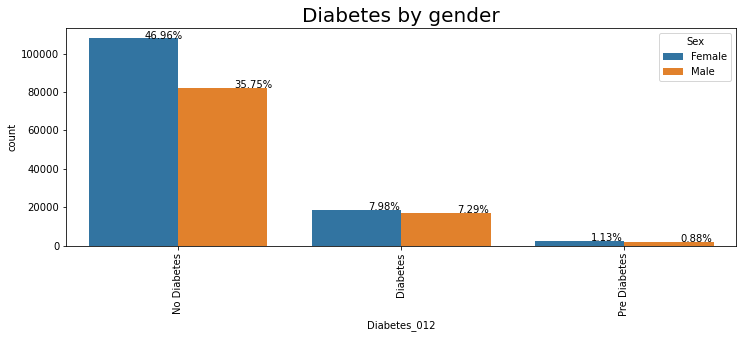

In [23]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=df_vis,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

#### Gender has no effect to developing diabetes.

## Smoker

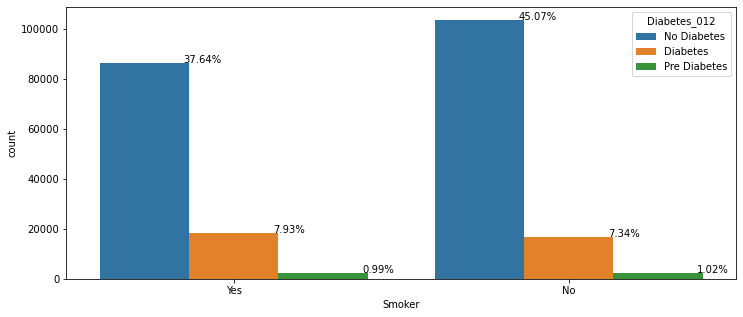

In [24]:

plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

### HvyAlcoholConsump

In [25]:
df_vis['HvyAlcoholConsump'].value_counts()

No     215831
Yes     13950
Name: HvyAlcoholConsump, dtype: int64

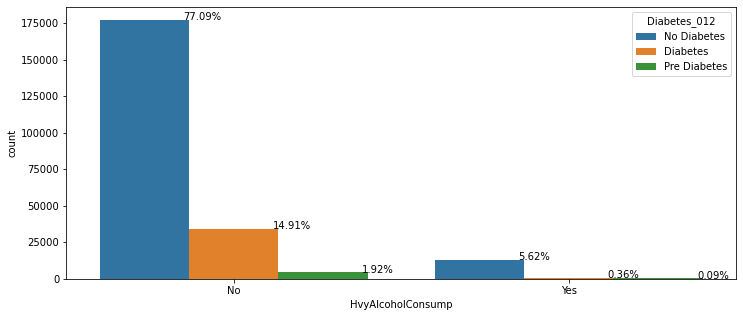

In [26]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

## Smoker and HvyAlcoholConsump's combined effect on Diabetes

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

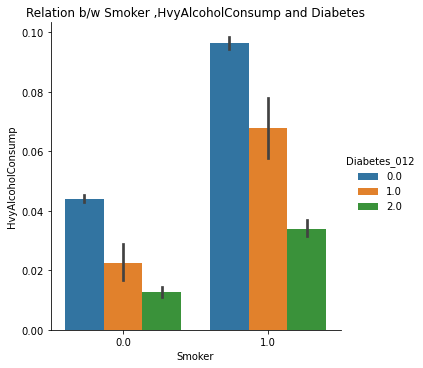

In [27]:
# (1 in Smoker is Yes), (1 in HvyAlcoholConsump is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_012"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

**result: Acording to this data, smoking and HvyAlcoholConsump both togather increase the risk of diabetes.**

---

### Stroke

<AxesSubplot:xlabel='Stroke', ylabel='count'>

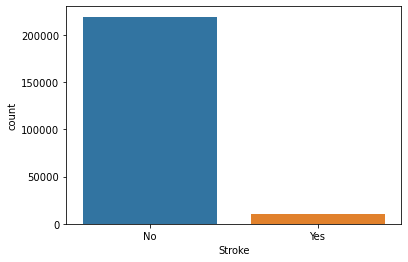

In [28]:
sns.countplot(df_vis['Stroke'])

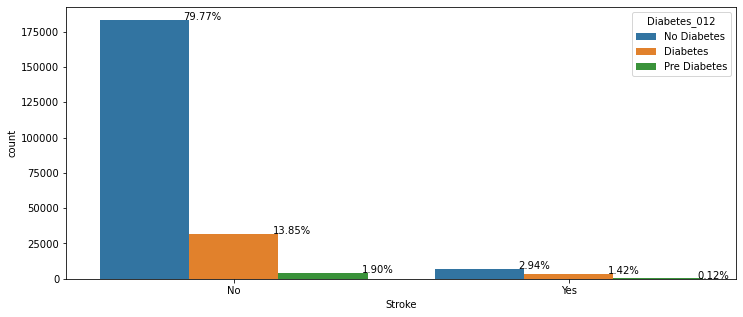

In [29]:

plt.figure(figsize=(12,5))

x= sns.countplot(x='Stroke', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

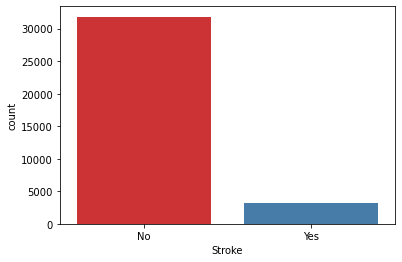

In [30]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['Diabetes_012']=='Diabetes'],x='Stroke',palette='Set1');

#### Diabetes have a low effect on having a stroke but in fact, Diabetes increases the chance of having a stroke, which can damage brain tissue and cause disability or even death

### HeartDiseaseorAttack

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

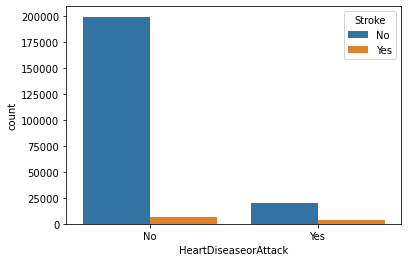

In [31]:
sns.countplot(data=df_vis,x='HeartDiseaseorAttack',hue='Stroke')

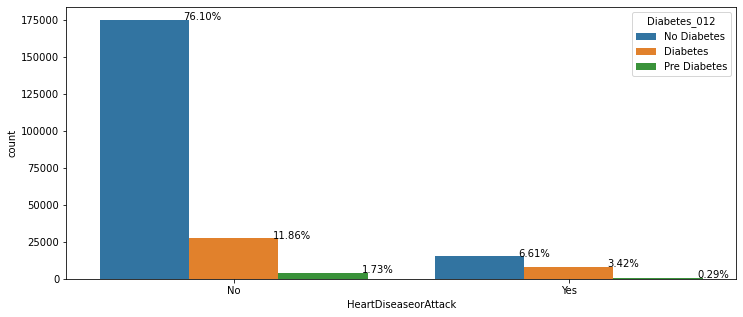

In [32]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

#### The chance of diabetes increases as the person has Heart Disease or Attack

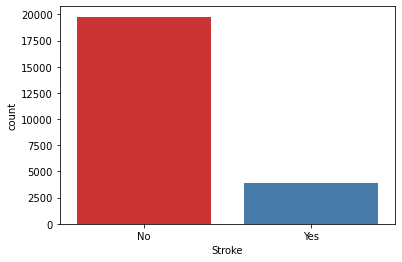

In [33]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['HeartDiseaseorAttack']=="Yes"],x='Stroke',palette='Set1');

#### It is normal that if the person have heart disease or attack it causes to have stroke

## Stroke and HeartDiseaseorAttack's combined effect on Diabetes

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

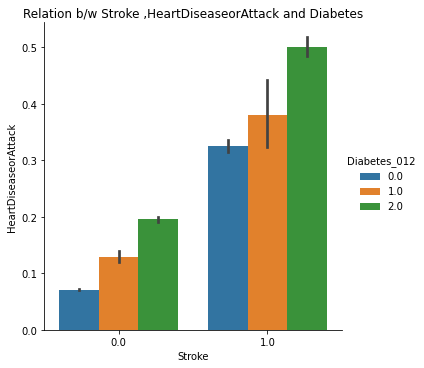

In [34]:
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_012"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

**result: Acording to this data, stroke and heartDiseaseorAttack togather increases the risk of Diabetes**

---

### High BP

<AxesSubplot:xlabel='Diabetes_012', ylabel='count'>

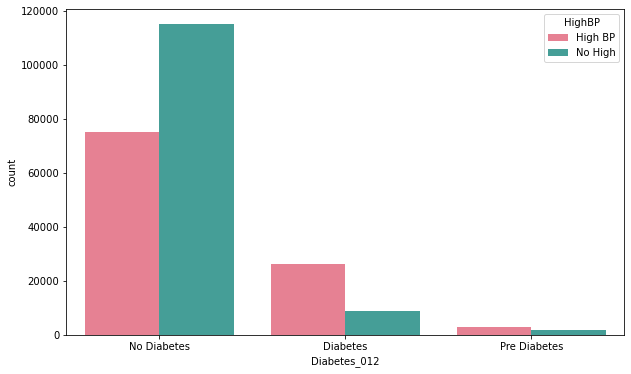

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighBP',palette='husl')

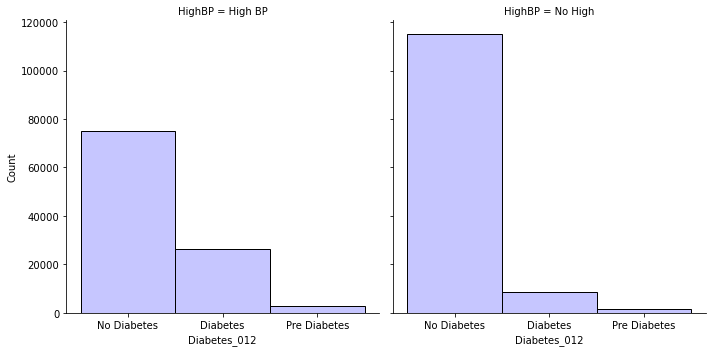

In [36]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#b3b3ff')

### HighChol

<AxesSubplot:xlabel='Diabetes_012', ylabel='count'>

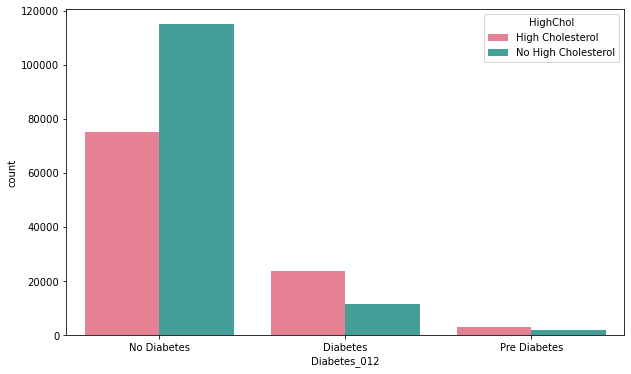

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighChol',palette='husl')

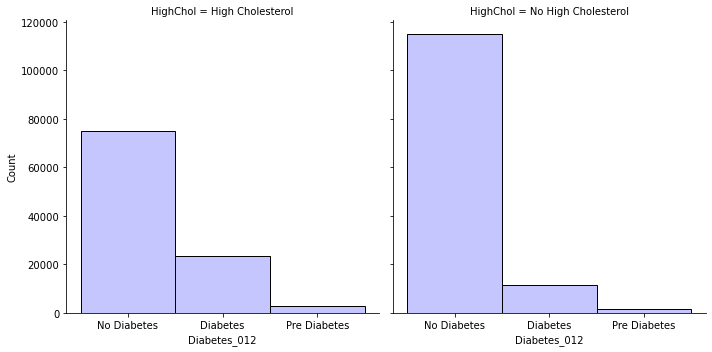

In [38]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighChol',color='#b3b3ff')

#### Most diabetics tend to have high blood pressure and cholesterol 

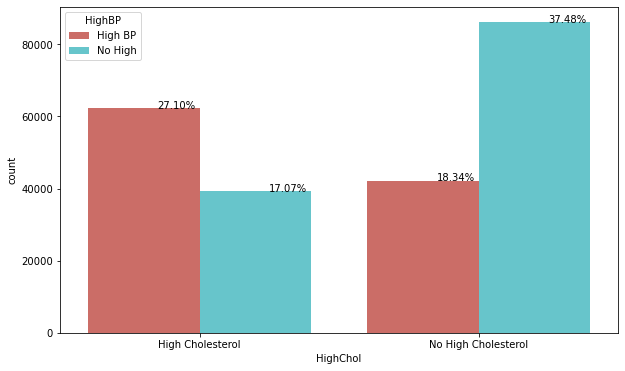

In [39]:
# HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=df_vis,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/df_vis.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

#### high cholesterol and high blood pressure are highly related to each other as people with high cholesterol tend to have high blodd pressure

The link between high blood pressure and high cholesterol goes in both directions. When the body can’t clear cholesterol from the bloodstream, that excess cholesterol can deposit along artery walls. When arteries become stiff and narrow from deposits, the heart has to work overtime to pump blood through them. This causes blood pressure to go up and up.

## Checking HighBP and HighChol's combined effect on Diabetes

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

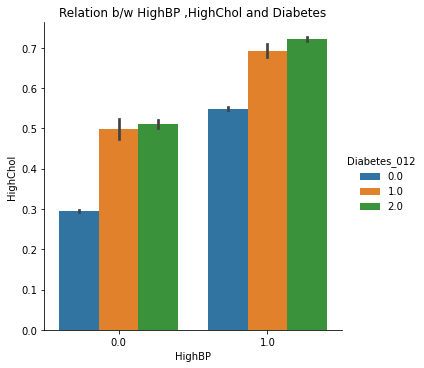

In [40]:
# (1 in HighBP is Yes), (1 in HighChol is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

**result: Acording to this data, HighBP and HighChol both togather increase the risk of diabetes.**

---

### BMI

<Figure size 864x360 with 0 Axes>

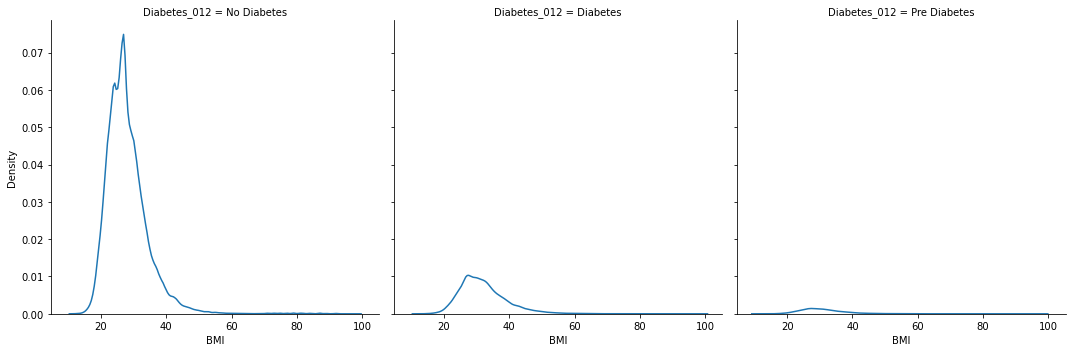

In [41]:

plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='Diabetes_012' , data = df_vis, kind="kde" ,palette="Set2");


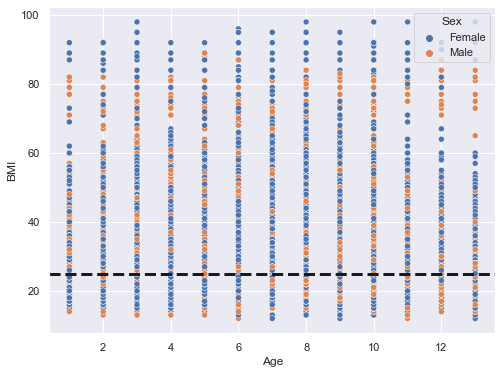

In [42]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df_vis, x="Age", y="BMI", hue='Sex')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

#### The BMI of the most peaople is more than the normal

## Split the BMI into (Underweight,Normal weight,Overweight,Obesity)

In [43]:
BMI=pd.cut( data['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [44]:
dd=pd.crosstab(df_vis['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,169.0,5350.0,11419.0,18118.0
No Diabetes,2856.0,67462.0,68505.0,50998.0
Pre Diabetes,28.0,924.0,1631.0,2042.0


In [45]:
Diabetes_sum_lst=list(dd.transpose().sum().values)
Diabetes_sum_lst

[35056.0, 189821.0, 4625.0]

In [46]:
for idx in range(dd.values.shape[0]):
    dd.values[idx]= dd.values[idx]/Diabetes_sum_lst[idx]*100

dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,0.482086,15.261296,32.573597,51.683021
No Diabetes,1.504575,35.539798,36.089263,26.866364
Pre Diabetes,0.605405,19.978378,35.264865,44.151351


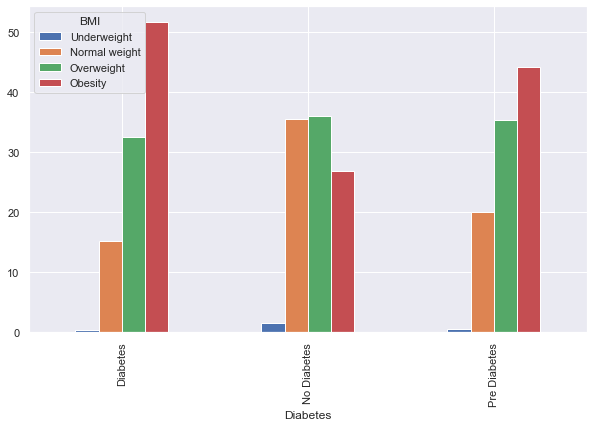

In [47]:
dd.plot(kind="bar",figsize=(10,6));

---

### Age

<Figure size 864x360 with 0 Axes>

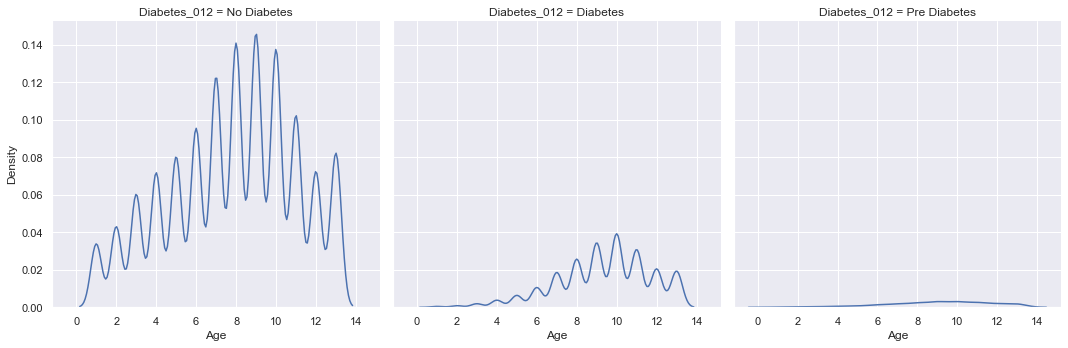

In [48]:

plt.figure(figsize=(12,5))
sns.displot(x='Age', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

In [49]:
age = pd.cut(df_vis['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229781, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 720x432 with 0 Axes>

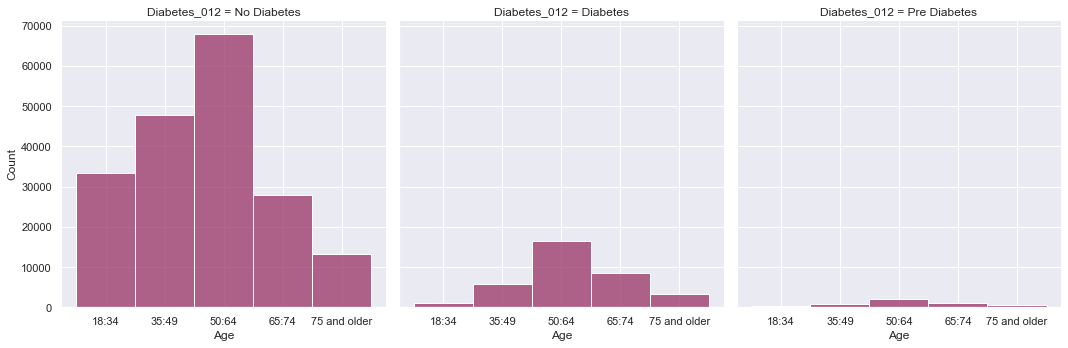

In [50]:
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,col='Diabetes_012',x=age,color='#993366');

#### people from 50 to 64 have higher chance to develop diabetes

---

### PhysHlth

<Figure size 864x360 with 0 Axes>

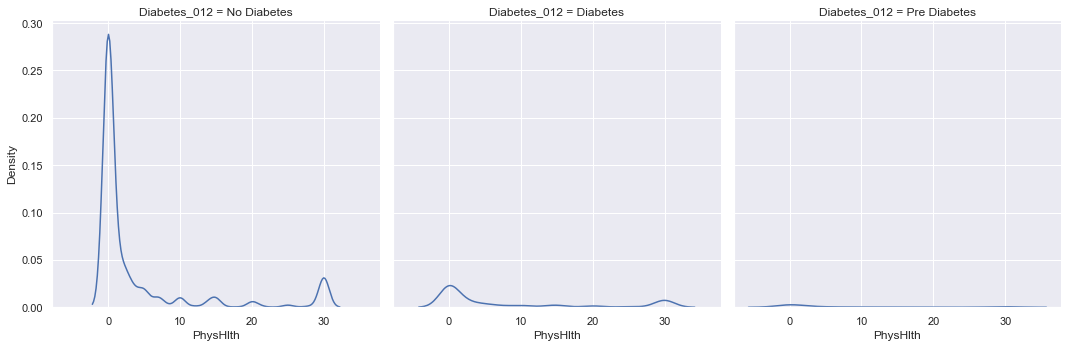

In [51]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

### MentHlth

<Figure size 864x360 with 0 Axes>

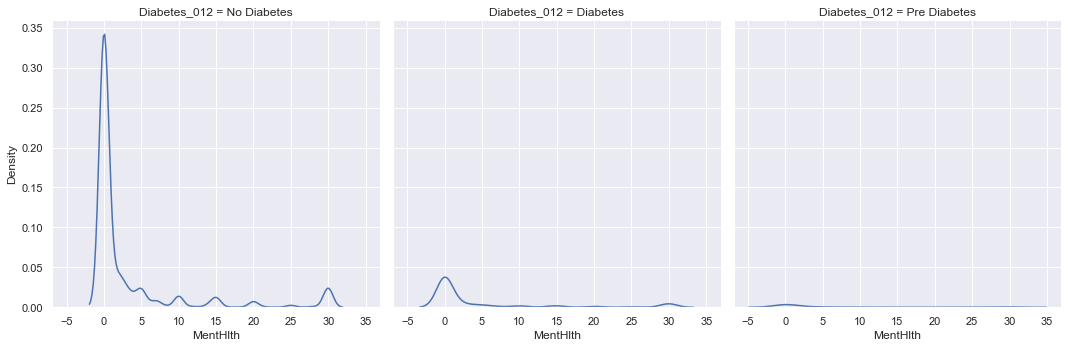

In [52]:

plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_012', data = df_vis, kind="kde")
plt.show()

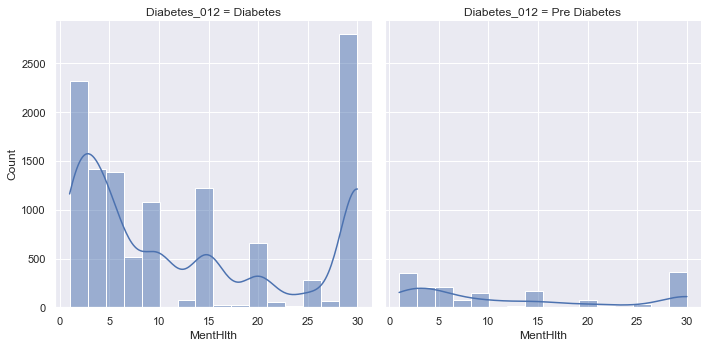

In [53]:
sns.displot(data=df_vis.loc[(df_vis['MentHlth']>0)&(df_vis['Diabetes_012']!="No Diabetes")],x='MentHlth',col='Diabetes_012',col_wrap=2,kde=True);

#### Mental health doesn't have effect on diabetes 

### GenHlth

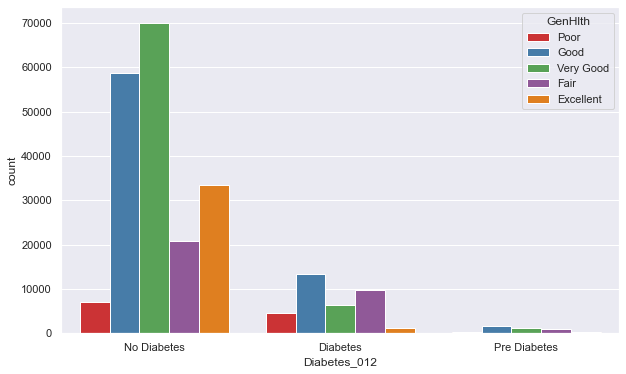

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='GenHlth',palette='Set1');

---

### Income

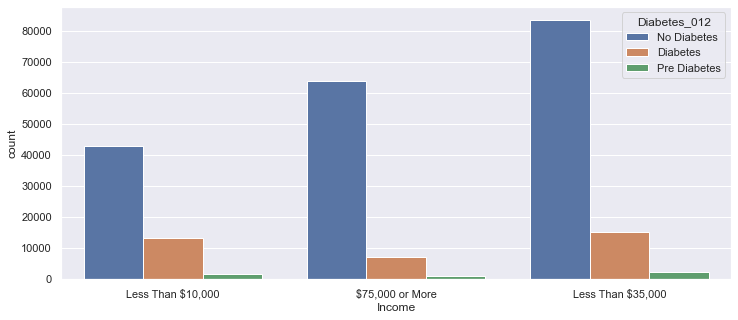

In [55]:
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_012' , data = df_vis)
plt.show()

<Figure size 720x432 with 0 Axes>

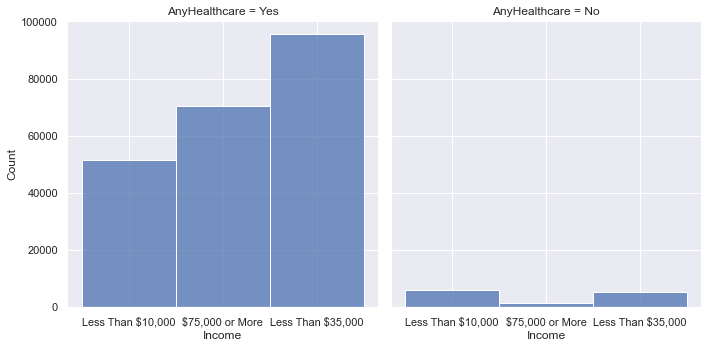

In [56]:
# The effect of the income on the healthcare
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,x='Income',col='AnyHealthcare');

#### If the person has more income he/she will has good healthcare

## Education

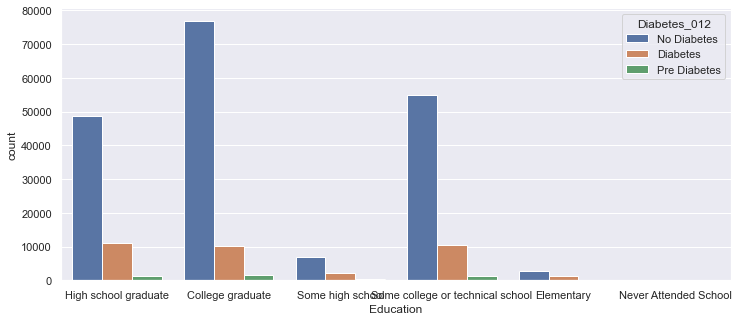

In [57]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Diabetes_012' , data = df_vis)
plt.show()

## Veggies 

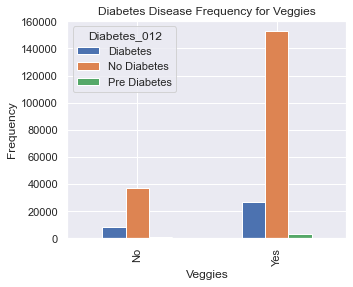

In [58]:
pd.crosstab(df_vis.Veggies,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

## Fruits

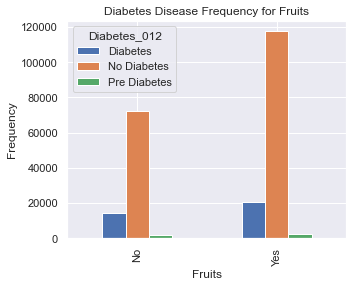

In [59]:
pd.crosstab(df_vis.Fruits,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

## PhysActivity

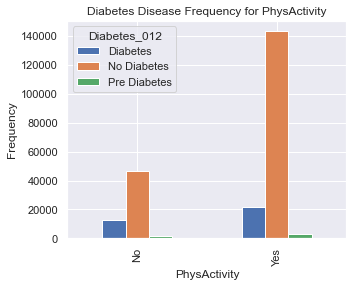

In [60]:
pd.crosstab(df_vis.PhysActivity,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

# More information from visualization

<AxesSubplot:xlabel='PhysActivity', ylabel='count'>

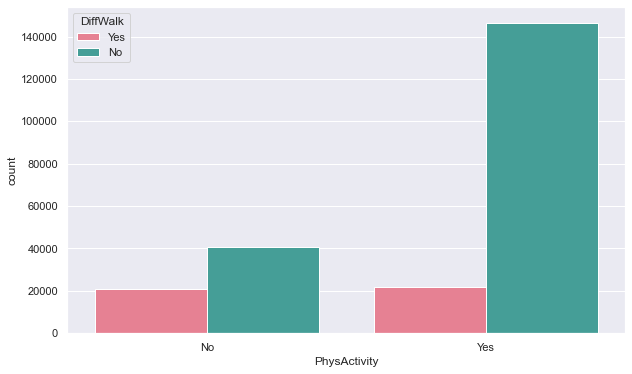

In [61]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_vis,x=df_vis['PhysActivity'],hue='DiffWalk',palette='husl')

#### Doing physical activity reduces the chance of having walking difficulty

<Figure size 1008x432 with 0 Axes>

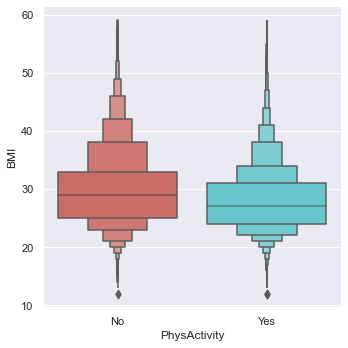

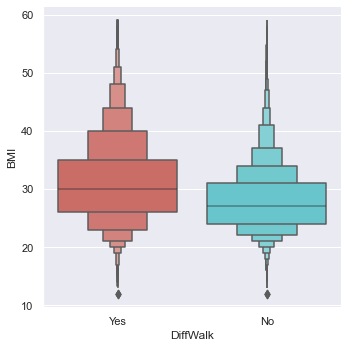

In [62]:
plt.figure(figsize = (14,6))
# plt.subplot(1, 1, 1)
x=sns.catplot(data=df_vis[df_vis['BMI']<60],x="PhysActivity", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

y=sns.catplot(data=df_vis[df_vis['BMI']<60],x="DiffWalk", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()


#### people who do Physical activity have lower BMI levels ,while people who have difficulty walking or climbing stairs tend to have higher BMI levels

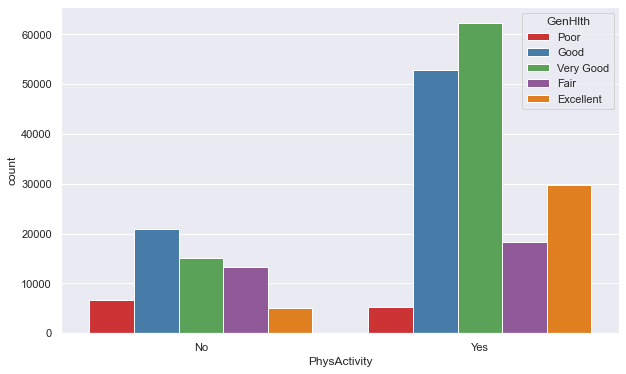

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='PhysActivity',hue='GenHlth',palette='Set1');

#### physical activity dramitically affects the genral health as people who do physical have way better general health 

**The summary of visualization:**

1. male and female are equally vulnerable for Diabetes.

2. people older than 45 are more vulnerable for diabetes then the younger ones.when the age increase the number of diabetic people also increas.

3. More than half of the diabetics are obese , alomst half of the pre diabetics are obese

4. percentages of diabetics and pre diabetics who suffers from obesity and overweight are much higher than percentage of non diabetic who suffers from obesity and overweight

5. when Education is going Higher the number of Diabetic people is dicreasing.

6. people with lower income has more risk of diabetes then the Higher ones.

7. GenHlth has a major effect on diabetes.when GenHlth is not good then the risk of diabetes increases rapidly.

8. MentHlth is a major factor which causes Diabetes.when Menthlth is not stable for long time then the risk of diabetes increases.

9. same goes with PhysHlth

10. Physical activity reduces the risk of diabetes.

11. Eating at least one fruit a day reduces the risk of diabetes.

12. Eating at least one veggies a day slower the risk of diabetes.

# Preprocessing

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

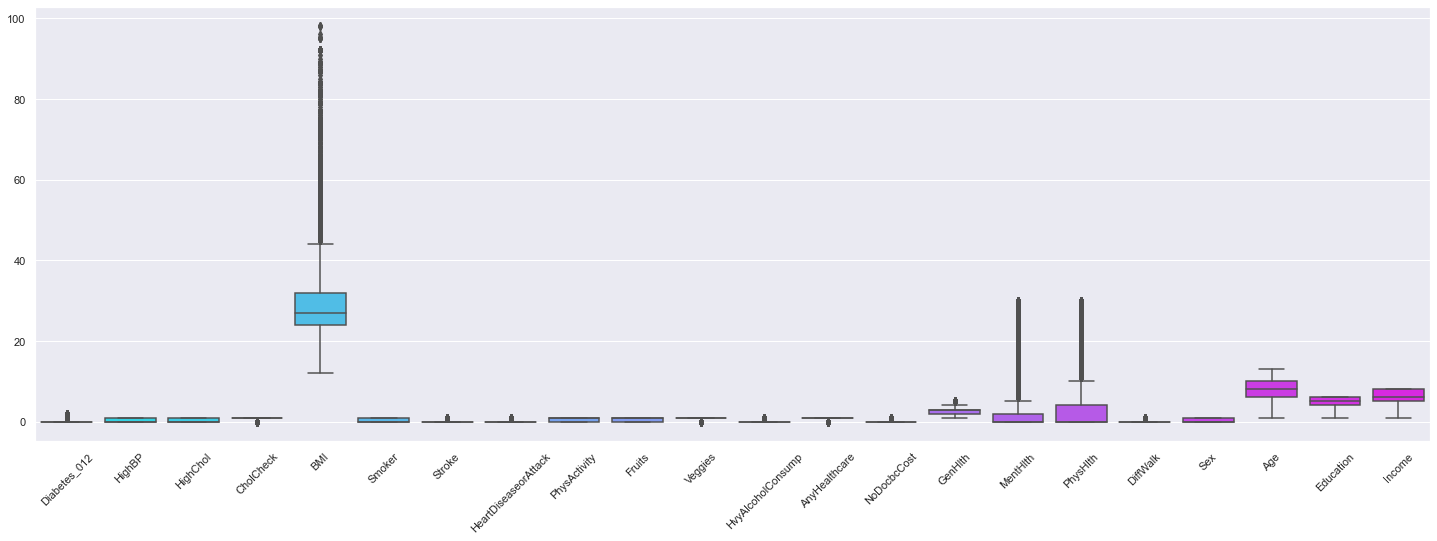

In [64]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

In [65]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

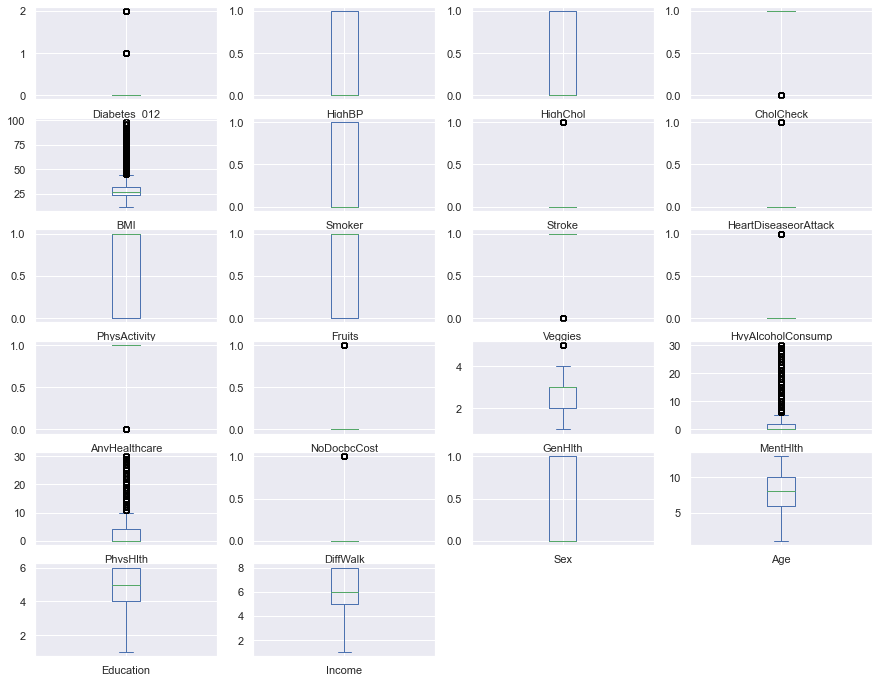

In [66]:
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

### Handling the outliers of the BMI

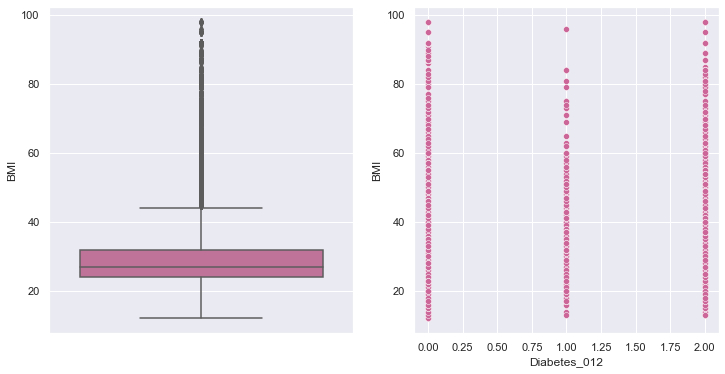

In [67]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [68]:
x=data[data['BMI']>=70]
x.shape

(599, 22)

In [69]:
df=data.copy()

In [70]:
df=data[data['BMI']<70]

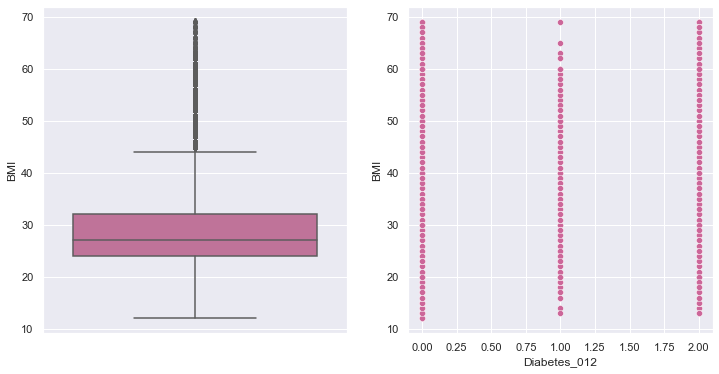

In [71]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [72]:
df['Diabetes_012'].value_counts()

0.0    189549
2.0     35016
1.0      4617
Name: Diabetes_012, dtype: int64

# Split the data

In [73]:
y = df['Diabetes_012']
x = df.drop(['Diabetes_012'], axis=1)

In [74]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

## Resampling

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

# Modeling 

## 1. Logistic Regression

In [76]:
lg = LogisticRegression()
lg.fit(X_res, y_res)

LogisticRegression()

In [77]:
print(lg.score(X_res, y_res))
print(lg.score(x_test, y_test))

0.5093179783549174
0.6006876570790282


In [78]:
y_pred_train_lg = lg.predict(X_res)
acc_train_lg = accuracy_score(y_res, y_pred_train_lg)

y_pred_test_lg = lg.predict(x_test)
acc_test_lg = accuracy_score(y_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

0.5093179783549174
0.6006876570790282


In [79]:
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

         0.0       0.93      0.61      0.74     47315
         1.0       0.03      0.29      0.05      1125
         2.0       0.33      0.58      0.42      8856

    accuracy                           0.60     57296
   macro avg       0.43      0.49      0.41     57296
weighted avg       0.82      0.60      0.68     57296



In [80]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_lg,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_lg,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_lg,average="micro"))

Precision: 0.601
Recall: 0.601
F-measure: 0.601


In [81]:
y_pred_prob_lg = lg.predict_proba(x_test)
roc_auc_score_lg= roc_auc_score(y_test, y_pred_prob_lg, multi_class="ovr")

print('ROC AUC Score: ',roc_auc_score_lg)

ROC AUC Score:  0.7330864326914256


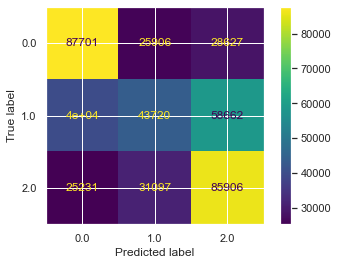

In [82]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(lg,X_res, y_res)
plt.show(pl)

## 2. Random Forest

In [83]:
### 2) Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_depth=16,max_features=10)
rf.fit(X_res, y_res)


RandomForestClassifier(max_depth=16, max_features=10)

In [84]:
print(rf.score(X_res, y_res))
print(rf.score(x_test, y_test))

0.892332353726957
0.8134075677185144


In [85]:
y_pred_train_rf = rf.predict(X_res)
acc_train_rf = accuracy_score(y_res, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.892332353726957
0.8134075677185144


In [86]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     47315
         1.0       0.07      0.01      0.01      1125
         2.0       0.44      0.38      0.41      8856

    accuracy                           0.81     57296
   macro avg       0.46      0.43      0.44     57296
weighted avg       0.79      0.81      0.80     57296



In [87]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_rf,average="micro"))

Precision: 0.813
Recall: 0.813
F-measure: 0.813


In [88]:
y_pred_prob_rf = rf.predict_proba(x_test)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_rf)

ROC AUC Score: 0.7492988004540533


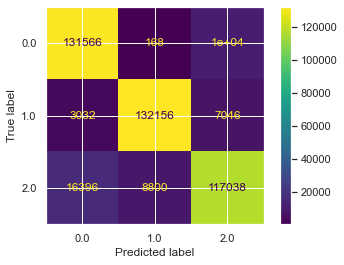

In [89]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(rf,X_res, y_res)
plt.show(pl)

## 2.2. Random Forest with cross val score

In [90]:
rf_crossval = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=16, max_features=10) 
rf_crossval.fit(X_res, y_res)
score = cross_val_score(rf_crossval, X_res, y_res, cv=3, scoring="accuracy")
score.mean()

0.8402679153132632

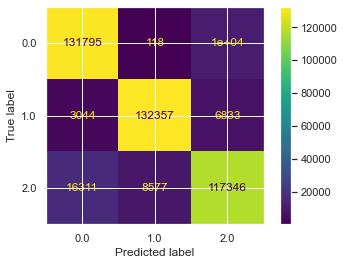

In [91]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(rf_crossval,X_res,y_res)
plt.show(pl)

In [92]:
y_train_pred = rf_crossval.predict(X_res)
precision_score(y_res, y_train_pred, average='macro')

0.8942551431474003

In [93]:
recall_score(y_res, y_train_pred, average='macro')

0.8940618979990719

In [94]:
y_test_pred = cross_val_predict(rf_crossval, x_test, y_test, cv=3)


In [95]:
recall_score(y_test, y_test_pred, average='micro')

0.8275795867076235

In [96]:
precision_score(y_test, y_test_pred, average='micro')

0.8275795867076235

## 3. XGB Classifier

In [97]:
xgb= XGBClassifier(max_depth=10)
xgb.fit(X_res, y_res)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [100]:
print(xgb.score(X_res, y_res))
print(xgb.score(x_test, y_test))

0.9510478038537433
0.8267592851158894


In [101]:
y_pred_train_xgb = xgb.predict(X_res)
acc_train_xgb = accuracy_score(y_res, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(acc_train_xgb)
print(acc_test_xgb)

0.9510478038537433
0.8267592851158894


In [102]:
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     47315
         1.0       0.17      0.00      0.00      1125
         2.0       0.49      0.22      0.30      8856

    accuracy                           0.83     57296
   macro avg       0.50      0.39      0.40     57296
weighted avg       0.78      0.83      0.79     57296



In [103]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_xgb,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_xgb,average="micro"))

Precision: 0.827
Recall: 0.827
F-measure: 0.827


In [104]:
y_pred_prob_xgb = xgb.predict_proba(x_test)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_xgb)

ROC AUC Score: 0.7318882684843914


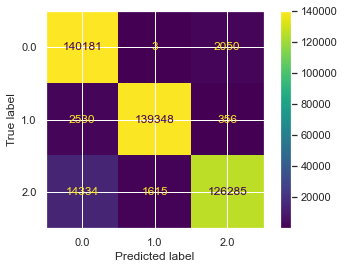

In [105]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(xgb,X_res, y_res)
plt.show(pl)

## 4. Decision Tree

In [106]:
dt= DecisionTreeClassifier(max_features=10 , max_depth=16)
dt.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=16, max_features=10)

In [107]:
print(dt.score(X_res, y_res))
print(dt.score(x_test, y_test))

0.7901345669811719
0.785464953923485


In [108]:
y_pred_train_dt = dt.predict(X_res)
acc_train_dt = accuracy_score(y_res, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.7901345669811719
0.785464953923485


In [109]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88     47315
         1.0       0.04      0.03      0.04      1125
         2.0       0.39      0.41      0.40      8856

    accuracy                           0.79     57296
   macro avg       0.44      0.44      0.44     57296
weighted avg       0.78      0.79      0.79     57296



In [110]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_dt,average="micro"))

Precision: 0.785
Recall: 0.785
F-measure: 0.785


In [111]:
y_pred_prob_dt = dt.predict_proba(x_test)
roc_auc_score_dt = roc_auc_score(y_test, y_pred_prob_dt, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_dt)

ROC AUC Score: 0.7098520758278704


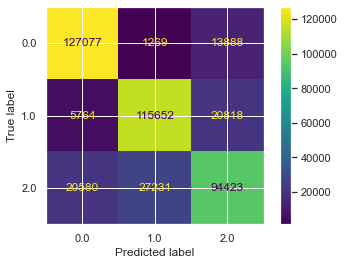

In [112]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(dt,X_res, y_res)
plt.show(pl)

# Compare between algorithms

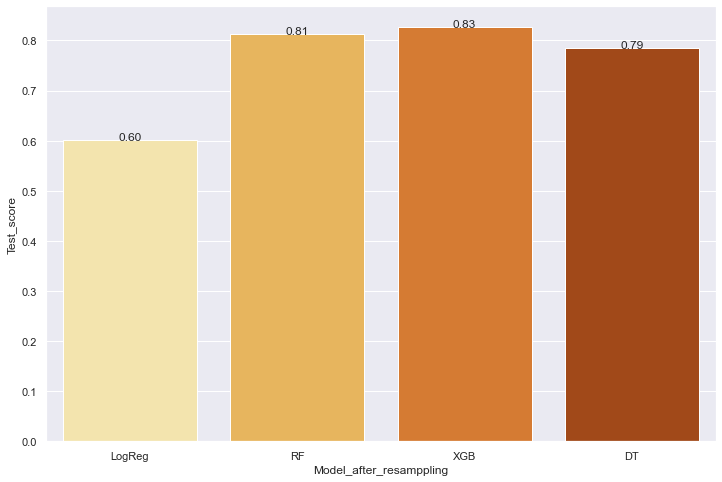

In [113]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['LogReg','RF','XGB','DT'],
        'Test_score': [accuracy_score(y_test, y_pred_test_lg),
                       accuracy_score(y_test, y_pred_test_rf),
                       accuracy_score(y_test, y_pred_test_xgb),
                      accuracy_score(y_test, y_pred_test_dt)],
        
        'ROC_AUC_Score': [roc_auc_score_lg,
                          roc_auc_score_rf, 
                          roc_auc_score_xgb,
                         roc_auc_score_dt]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [114]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Test_score,ROC_AUC_Score
1,RF,0.813408,0.749299
0,LogReg,0.600688,0.733086
2,XGB,0.826759,0.731888
3,DT,0.785465,0.709852


# Conclusion

**1. major feature variables for Diabetes are : HIghBP , HighChol , BMI , Stroke , GenHlth , MentHlth , PhysHlth , Age , Eduation and Income.**

**2. Feature variables which increases the risk of Diabetes togather are : Smoking and HvyAlcoholConsump , Stroke and HeartDiseaseorAttack , HighBP and HighChol.**

**3. Feature variable Which is least effective on Diabetes , but they can help in dicreasing the risk Diabetes are : PhysActivity , Fruits , Veggies , AnyHealthcare , CholChek.**


**4. Because of imbalanced data the basic accuracy score was misleading, so I used the right evaluation metrics like Precision/Specificity, Recall/Sensitivity, F1 score, and AUC.**

**5. After the preprocessing and resampling of the data, it became balanced and more accurate**

**6. There is clear differences in the metrics between applying the algorithms after resampling**

**7. The XGBoost is the best algorithm has score on test and Auc score.**

**8. After feature selection by chi2 and chhosing 70 % of the features (14 features) the accuracy increased to 100%.**